In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
alimentos = pd.read_csv('alimentos.csv', sep=',')
alimentos

,Alimento,Calorias (Kcal),Porção (g),Colheres de Sopa,Unidade,Carboidratos (g),Proteínas (g),Gorduras (g),Fonte dos Dados
0,Arroz Branco,97,100.0,6.6,NaN,26.30,2.60,0.20,(TACO)
1,Feijão Preto,132,100.0,6.6,NaN,15.40,9.00,1.40,(TACO)
2,Filé de Frango (grelhado),165,100.0,NaN,1.0,23.60,31.00,3.60,(TACO)
3,Filé de Contrafilé (grelhado),194,100.0,NaN,1.0,0.00,35.00,4.50,(TACO)
4,Filé de Pescada Frito (Tilápia),171,100.0,NaN,1.0,0.00,28.60,8.10,(TACO)
5,Ovo de Galinha Frito,95,50.0,NaN,1.0,5.50,6.30,6.80,(TACO)
6,Ovo de Galinha Cozido,78,50.0,NaN,1.0,5.50,6.30,5.30,(TACO)
7,Azeite de Oliva Extra Virgem,884,100.0,7.5,NaN,0.00,0.00,100.00,(FatSecret)
8,Banana Nanica,92,100.0,NaN,1.0,23.80,1.40,0.40,(TACO)
9,Maçã Fuji,18,182.0,NaN,1.0,4.83,0.09,0.06,(TACO)


In [ ]:
'''
def verificar_medida(id):
    if pd.isnull(alimentos.loc[id, 'Colheres de Sopa']):
        print('Está em unidades')
    else:
        print('Está em colheres de sopa')
'''

In [ ]:
novo_alimento = pd.DataFrame([{
    'Alimento': 'Pão (Maçã, quinoa e castanha)',
    'Calorias (Kcal)': 126,
    'Porção (g)': 50,
    'Colheres de Sopa': float('nan'),
    'Unidade': 2,
    'Carboidratos (g)': 18,
    'Proteínas (g)': 7.5,
    'Gorduras (g)': 2.6,
    'Fonte dos Dados': 'Embalagem'
}])

alimentos = pd.concat([alimentos, novo_alimento], ignore_index=True)
alimentos.to_csv('alimentos.csv', index=False)

## funcao com input()

In [ ]:
lista_codg = []
lista_aux = []
aux = 0

def alimento():

    #codg = int(input('\nCódigo númerico do alimento: '))
    lista_codg.append(codg)
    
    qnt = float(input('Colheres de sopa ou unidades: '))
    
    if (pd.isnull(alimentos.loc[codg, 'Unidade'])):
        aux = qnt/alimentos.loc[codg, 'Colheres de Sopa']
    else:
        aux = qnt/alimentos.loc[codg, 'Unidade']
        
    lista_aux.append(aux)
    
def refeicao():
    
    flag = True

    while flag:

        alimento()

        outro = input('\nInserir outro alimento?(s/n): ')

        if (outro == 'N' or outro == 'n'):
            flag = False


    #mostra os valores da refeição

    calt = 0
    carb = 0
    prot = 0
    gord = 0

    for i in range(len(lista_codg)):
        calt = calt + lista_aux[i] * alimentos.loc[lista_codg[i],'Calorias (Kcal)']
        carb = carb + lista_aux[i] * alimentos.loc[lista_codg[i],'Carboidratos (g)']
        prot = prot + lista_aux[i] * alimentos.loc[lista_codg[i],'Proteínas (g)']
        gord = gord + lista_aux[i] * alimentos.loc[lista_codg[i],'Gorduras (g)']


    print('\nAqui estão algumas informações nutricionais sobre sua refeição:')    
    print('Calorias (Kcal): ', round(calt, 2))
    print('Carboidratos (g): ', round(carb, 2))
    print('Proteínas (g): ', round(prot, 2))
    print('Gorduras (g): ', round(gord, 2))
    
    return {'Calorias (Kcal)': round(calt, 2),
            'Carboidratos (g)': round(carb, 2),
            'Proteínas (g)': round(prot, 2),
            'Gorduras (g)': round(gord, 2)}

## funcao sem input()

In [3]:
def refeicao_sem_input(dicionario):
    
    nomes_alimentos = list(dicionario.keys())
    medidas_alimentos = list(dicionario.values())
    calt, carb, prot, gord = [0,0,0,0]
    
    for i in range(len(dicionario)):
        indice = alimentos.loc[alimentos['Alimento'] == nomes_alimentos[i]].index[0]
        
        if (np.isnan(alimentos.loc[indice, 'Unidade'])):
            aux = medidas_alimentos[i]/alimentos.loc[indice, 'Colheres de Sopa']
        else:
            aux = medidas_alimentos[i]/alimentos.loc[indice, 'Unidade']
            
        medidas_alimentos[i] = aux
   
        calt = calt + medidas_alimentos[i] * alimentos.loc[indice,'Calorias (Kcal)']
        carb = carb + medidas_alimentos[i] * alimentos.loc[indice,'Carboidratos (g)']
        prot = prot + medidas_alimentos[i] * alimentos.loc[indice,'Proteínas (g)']
        gord = gord + medidas_alimentos[i] * alimentos.loc[indice,'Gorduras (g)']


        
    informacoes = {'Calorias (Kcal)': round(calt, 2),
                   'Carboidratos (g)': round(carb, 2),
                   'Proteínas (g)': round(prot, 2),
                   'Gorduras (g)': round(gord, 2)}
    
    return informacoes

## funcao para calcular valores diarios

In [4]:
def valor_diario(refeicoes):
    calt, carb, prot, gord = [0,0,0,0]
    
    for i in range(len(refeicoes)):
        calt = calt + refeicoes[i]['Calorias (Kcal)']
        carb = carb + refeicoes[i]['Carboidratos (g)']
        prot = prot + refeicoes[i]['Proteínas (g)']
        gord = gord + refeicoes[i]['Gorduras (g)']
    
    return [round(calt, 2),round(carb, 2),round(prot, 2),round(gord, 2)]

### 17/06

cafe_da_manha = {
    'Banana Nanica': 1,
    'Leite Integral': 0.5,
    'Hipercalórico': 0.5,
    'Aveia em Flocos (Nestlé)': 3,
    'Ovo de Galinha Cozido': 3
}

almoco = {
    'Arroz Branco': 8,
    'Feijão Preto': 8,
    'Filé de Contrafilé (grelhado)': 1.5,
    'Azeite de Oliva Extra Virgem': 1
}

cafe_da_tarde = {
    'Hipercalórico': 0.5,
    'Whey (Itambé)': 2
}

janta = {
    'Arroz Branco': 6,
    'Feijão Preto': 4,
    'Filé de Frango (grelhado)': 1.5,
    'Azeite de Oliva Extra Virgem': 1
}

In [86]:
### 18/06

cafe_da_manha = {
    'Leite Integral': 0.5,
    'Hipercalórico': 0.5,
    'Ovo de Galinha Cozido': 2
}

almoco = {
    'Arroz Branco': 6,
    'Feijão Preto': 4,
    'Filé de Frango (grelhado)': 1,
    'Azeite de Oliva Extra Virgem': 1
}

cafe_da_tarde = {
    'Hipercalórico': 1,
    'Aveia em Flocos (Nestlé)': 4,
    'Banana Nanica': 1,
    'Leite Integral': 0.5
    
}

janta = {
    'Arroz Branco': 6,
    'Feijão Preto': 6,
    'Filé de Contrafilé (grelhado)': 1,
    'Azeite de Oliva Extra Virgem': 1,
    'Ovo de Galinha Frito': 2
}

In [87]:
manha_valores = refeicao_sem_input(cafe_da_manha)
manha_valores

{'Calorias (Kcal)': 329.0,
 'Carboidratos (g)': 40.8,
 'Proteínas (g)': 18.7,
 'Gorduras (g)': 13.85}

In [88]:
almoco_valores = refeicao_sem_input(almoco)
almoco_valores

{'Calorias (Kcal)': 451.05,
 'Carboidratos (g)': 56.84,
 'Proteínas (g)': 38.82,
 'Gorduras (g)': 17.96}

In [89]:
tarde_valores = refeicao_sem_input(cafe_da_tarde)
tarde_valores

{'Calorias (Kcal)': 526.17,
 'Carboidratos (g)': 99.93,
 'Proteínas (g)': 16.63,
 'Gorduras (g)': 6.97}

In [90]:
janta_valores = refeicao_sem_input(janta)
janta_valores

{'Calorias (Kcal)': 710.05,
 'Carboidratos (g)': 48.91,
 'Proteínas (g)': 58.15,
 'Gorduras (g)': 32.89}

--------

In [91]:
#refeicoes = [cafe_da_manha, almoco, cafe_da_tarde]
refeicoes = [manha_valores, almoco_valores, tarde_valores, janta_valores]

In [92]:
valores_diarios = valor_diario(refeicoes)
valores_diarios

[2016.27, 246.48, 132.3, 71.67]

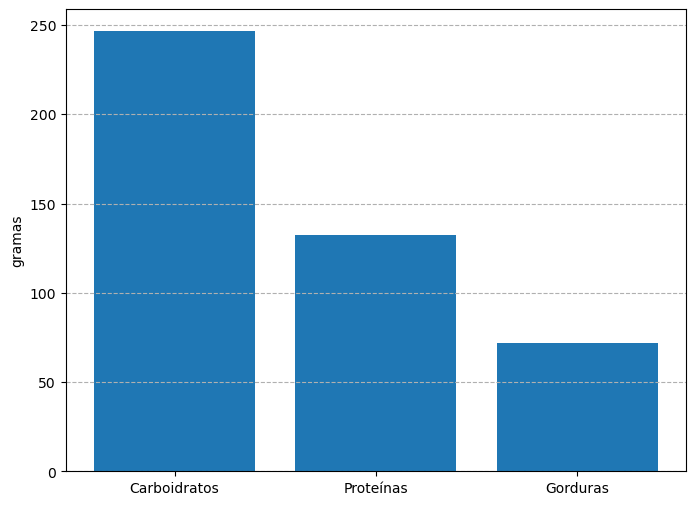

In [93]:
plt.figure(figsize=(8,6))
plt.bar(['Carboidratos', 'Proteínas', 'Gorduras'], valores_diarios[1:])
plt.ylabel('gramas')
plt.grid(axis='y', linestyle='--')

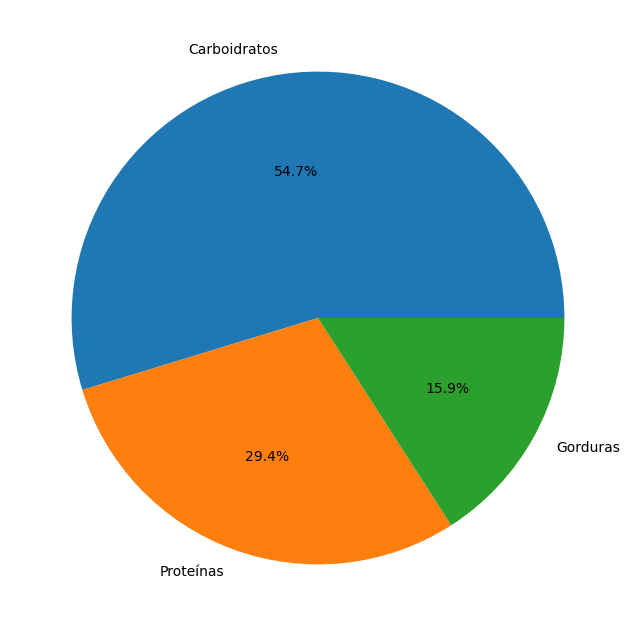

In [94]:
plt.figure(figsize=(10, 8))
plt.pie(valores_diarios[1:], labels=['Carboidratos', 'Proteínas', 'Gorduras'] , autopct="%1.1f%%")

plt.show()


In [95]:
print('Calorias em Kcal:',valores_diarios[0])

Calorias em Kcal: 2016.27


In [96]:
print('Calorias (Kcal):',valores_diarios[0],
      '\nCarboidratos (g):',valores_diarios[1],
      '\nProteínas (g):',valores_diarios[2],
      '\nGorduras (g):',valores_diarios[3])

Calorias (Kcal): 2016.27 
Carboidratos (g): 246.48 
Proteínas (g): 132.3 
Gorduras (g): 71.67


----

In [68]:
def add_refeicoes(valores_diarios, data_string):
    
    
    data = datetime.date(year = int(data_string[4:8]),
                         month = int(data_string[2:4]),
                         day = int(data_string[0:2]))
    
    data_br = data.strftime("%d-%m-%Y")
    nova_linha = {
        'Data': data_br,
        'Kcal': valores_diarios[0],
        'Carb': valores_diarios[1],
        'Prot': valores_diarios[2],
        'Gord': valores_diarios[3],
    }
    return nova_linha

In [97]:
nova_linha = add_refeicoes(valores_diarios, '18062024')
nova_linha = pd.DataFrame([nova_linha])

In [ ]:
#importar dataset com macros_diarios
macros_diarios = pd.read_csv('macros_diarios.csv')
macros_diarios

In [98]:
macros_diarios = pd.concat([macros_diarios, nova_linha], ignore_index=True)
macros_diarios

,Data,Kcal,Carb,Prot,Gord
0,17-06-2024,2233.49,258.29,184.88,68.88
1,18-06-2024,2016.27,246.48,132.30,71.67


In [79]:
#salvar o dataframe atualizado
macros_diarios.to_csv('macros_diarios.csv', index=False)